In [1]:
%matplotlib inline
import numpy
import cv2
import matplotlib.pyplot as plt

In [2]:
!pip install opencv-python
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
img = numpy.zeros((64, 64))
for i in range(64):
    img[:][i] = int(i/64*255)
#cv2.imshow("image", img)
#cv2.destroyWindow('image')

In [5]:
dir(numpy)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'Bytes0',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'Datetime64',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Str0',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'Uint64',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',


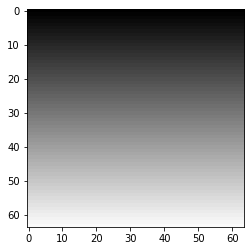

In [4]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [11]:
fquarter=r"/home/bibo/works/vtk-s/textbook-example-and-data/Data/headsq/quarter.63"
quarter = cv2.imread(fquarter)

In [12]:
type(quarter)
#plt.imshow(quarter)

NoneType

In [34]:
import os

#dir(os.path)
os.path.isfile(fquarter)
with open(fquarter, 'rb') as f:
    qimg=f.read()
len(qimg)
type(qimg)
dir(qimg)
dt = numpy.dtype(numpy.uint16)
dt = dt.newbyteorder('>')
qimg2=numpy.frombuffer(qimg, dtype=dt)
print(f" img max={qimg2.max()}, min={qimg2.min()}")
#qimg2 =qimg2*255.0/qimg2.max()
print("qimg shape=",qimg2.shape)
qimg2.resize(64, 64)
print(qimg2.shape, qimg2.dtype)
print(qimg2[33][:])
qimg3=qimg2.astype(numpy.uint16)
print(f" img max={qimg3.max()}, min={qimg3.min()}")
print(qimg3.shape, qimg3.dtype)

 img max=65284, min=0
qimg shape= (4096,)
(64, 64) >u2
[    0     0 36352 30464 28416 27392 29440 29184 29952 30976 27648 47104
 39936 39938 51203 56067  9476 57607  9993 12805 17924 17156 17156 20228
 16900 14852 56323 41475  5379  4355 53250 16132 16388 18692 15620 14340
 17924 18180 16644 18948 16644 17156 55556 24584 15882  4358 10756 58627
 46083  2307 30464 26880 27904 27648 28160 30464 36352 30720 27136 26368
 25344 25600     0     0]
 img max=65284, min=0
(64, 64) uint16


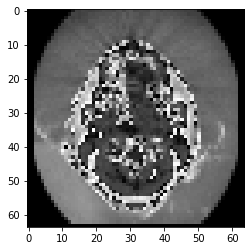

In [35]:
plt.imshow(qimg3, cmap='gray', vmin=0, vmax=qimg2.max())

In [68]:
#help(numpy.frombuffer)

In [39]:
def show_headsq_raw_data(num:int):
    img_name = f"quarter.{num}"
    fquarter=r"/home/bibo/works/vtk-s/textbook-example-and-data/Data/headsq/"+img_name

    if not os.path.isfile(fquarter):
        print(f"file not vaild: {fquarter}")
        return -1
    quarter = cv2.imread(fquarter)
    with open(fquarter, 'rb') as f:
        raw_data=f.read()
    dt = numpy.dtype(numpy.uint16) # 知道目标的数据类型非常重要，否则我没办法进行单元素长度划分
    dt = dt.newbyteorder('>')
    img=numpy.frombuffer(raw_data, dtype=dt)
    print(f" img max={img.max()}, min={img.min()}")
    img.resize(64, 64)
    plt.imshow(img, cmap='gray', vmin=0, vmax=qimg2.max()) # 这个vmax很重要， 会自动将像素的数值映射到颜色可视范围；
    return 0

 img max=65288, min=0
 img max=65288, min=0
 img max=65287, min=0
 img max=65287, min=0
 img max=65283, min=0
 img max=65287, min=0
 img max=65289, min=0
 img max=65286, min=0


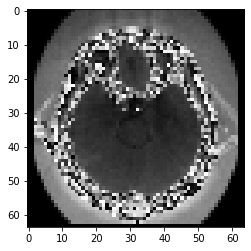

In [41]:
import time
for i in range(1, 9, 1):
    show_headsq_raw_data(i)
    time.sleep(2)

 img max=65283, min=0


0

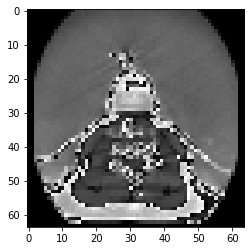

In [44]:
show_headsq_raw_data(91)

In [45]:
!pwd

/mnt/e/workspace/jupyters
